# 1st Chapter
Example of model-based learning using linear regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [2]:
gdp = pd.read_csv('gdp_per_capita.csv', sep='\t', encoding='latin1', thousands=',').dropna()
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [3]:
gdp.isna().sum()

Country                          0
Subject Descriptor               0
Units                            0
Scale                            0
Country/Series-specific Notes    0
2015                             0
Estimates Start After            0
dtype: int64

In [4]:
gdp.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [5]:
oecd = pd.read_csv('oecd_bli_2015.csv', thousands = ',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()


,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Dwellings without basic facilities,Value,Total,Percentage,units,1.1
1,Austria,Dwellings without basic facilities,Value,Total,Percentage,units,1.0
2,Belgium,Dwellings without basic facilities,Value,Total,Percentage,units,2.0
3,Canada,Dwellings without basic facilities,Value,Total,Percentage,units,0.2
4,Czech Republic,Dwellings without basic facilities,Value,Total,Percentage,units,0.9


In [6]:
oecd.isna().sum()

Country       0
Indicator     0
Measure       0
Inequality    0
Unit          0
PowerCode     0
Value         0
dtype: int64

In [7]:
oecd.shape

(3292, 7)

# Getting countries and life satisfaction from oecd

In [8]:
oecd_life_sat = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd_life_sat.columns = ['Country', 'Life satisfaction']
oecd_life_sat.head()


,Country,Life satisfaction
2669,Australia,7.3
2670,Austria,6.9
2671,Belgium,6.9
2672,Canada,7.3
2673,Czech Republic,6.5


# Getting countries and GPD from gdp

In [9]:
gdp_country = gdp[['Country', '2015']]
gdp_country.columns = ['Country', 'GPD per capita ($)']
gdp_country.head()

,Country,GPD per capita ($)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


# Join GPD and Life Satisfaction

In [10]:
statistics_per_country = pd.merge(gdp_country, oecd_life_sat, on = 'Country').groupby(['Country']).mean()
statistics_per_country.head()

,GPD per capita ($),Life satisfaction
Country,,
Australia,50961.865,7.300
Austria,43724.031,7.060
Belgium,40106.632,6.950
Brazil,8669.998,6.925
Canada,43331.961,7.280


Text(0.5, 0, 'GPD per capita in USD')

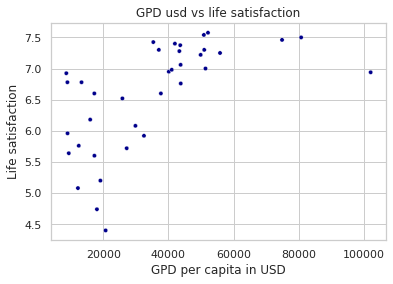

In [42]:
X = statistics_per_country[['GPD per capita ($)']].values
Y = statistics_per_country[['Life satisfaction']].values

sns.set(style = 'whitegrid')
sns.scatterplot(x = statistics_per_country['GPD per capita ($)'],
y = statistics_per_country['Life satisfaction'], data = statistics_per_country, color = 'darkblue',
size = 7)
plt.legend([],[], frameon=False)
plt.title('GPD usd vs life satisfaction')
plt.xlabel('GPD per capita in USD')


In [12]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

In [13]:
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.26537131]]
